<a href="https://www.kaggle.com/code/pedrodicati/lung-cancer-with-accuracy-99-2?scriptVersionId=113950492" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Lung Cancer Prediction 🫁🩺
<div align="center">
<img src="https://i.pinimg.com/originals/94/ab/af/94abaf23721ca08808b03c7cece5beef.png" width="300px">
<\div>
    
O *dataset* escolhido, trata-se de pacientes que possuem câncer de pulmão, onde são apresentadas várias *`features`* que ditam sobre os hábitos do paciente (estas *features* são explicadas abaixo), no qual a coluna *`target`* é o nível da gravidade do câncer, sendo dividida em três níveis, *`"low"`*, *`"medium"`* e *`"high"`*. Iremos analisar e desenvolver um método preditivo para a análise e predição do nível de gravidade.

Aqui está um informativo sobre o que cada coluna do *dataset* está passando para a gente.

| Nome da coluna |                Descrição                          |
|----------------      |---------------------------------------------------|
|     Age              | A idade do paciente. |
|     Gender           | O gênero do paciente. |
| Air Pollution        | O nível de exposição à poluição do ar do paciente. |
| Alcohol Use          | Nível de uso de álcool. |
| Dust Allergy         | Nível de alergia à poeira |
| OccuPational Hazards | Nível de riscos ocupacionais. |
| Genetic Risk | Risco Genético. |
| Chronic Lung Disease | Nível de doença pulmonar crônica. |
| Balanced Diet | Nível da dieta balanceada |
| Obesity | Nível de obesidade |
| Smoking | Nível do tabagismo |
| Passive Smoker | Nível de fumante passivo |
| Chest Pain | Nível de dor torácica |
| Coughing of Blood | Nível de tosse |
| Fatigue | Nível de fadiga |
| Weight Loss | Nível de perda de peso |
| Shortness of Breath | Nível de falta de ar |
| Wheezing | Nível de chiado |
| Swallowing Difficulty | Dificuldade de deglutição |
| Clubbing of Finger Nails | Nível de baqueteamento das unhas |
| Level | Nível do câncer |


## 1. Importando bibliotecas e dados

Nesta seção, importamos as bibliotecas necessárias para a nossa modelagem e também o nosso `dataset` que contém nossos dados.

In [1]:
# data analytics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# model predict 
import keras
from keras.utils import np_utils

# edit data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

In [2]:
cancer = pd.read_csv("/kaggle/input/cancer-patients-and-air-pollution-a-new-link/cancer patient data sets.csv")

## Análise dos dados

Aqui começamos analisar nossos dados, seus tipos, suas correlações e entre outras informações relacionadas ao conjunto de dados. Também verificamos tipos nulos existentes no `dataset` e plotamos alguns gráficos.

In [3]:
cancer.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [4]:
print(f"A quantidade de colunas do DataFrame são {cancer.shape[1]} e a quantidade de amostras são {cancer.shape[0]}")

A quantidade de colunas do DataFrame são 26 e a quantidade de amostras são 1000


In [5]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

As colunas `index` e `Patient Id` são colunas que podemos excluir, pois são somente identificadores de dados, desta forma, não têm peso sobre a predição do modelo, podendo assim, ser removidas sem danos ao modelo.

In [6]:
cancer.drop(columns=['index', 'Patient Id'], inplace=True)

cancer.columns

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

Aqui é feita a verificação de valores faltantes. No caso, nenhum valor foi encontrado.

In [7]:
cancer.isnull().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [8]:
targets = cancer['Level'].unique()
print(f"O dataset possui como target a coluna Level, que possui {len(targets)} classes e estas são elas: {targets}")

O dataset possui como target a coluna Level, que possui 3 classes e estas são elas: ['Low' 'Medium' 'High']


* Visualizando os dados

Plotamos alguns gráficos, onde podemos obersar influências ou variações de dados que o dataset pode vir a ter.

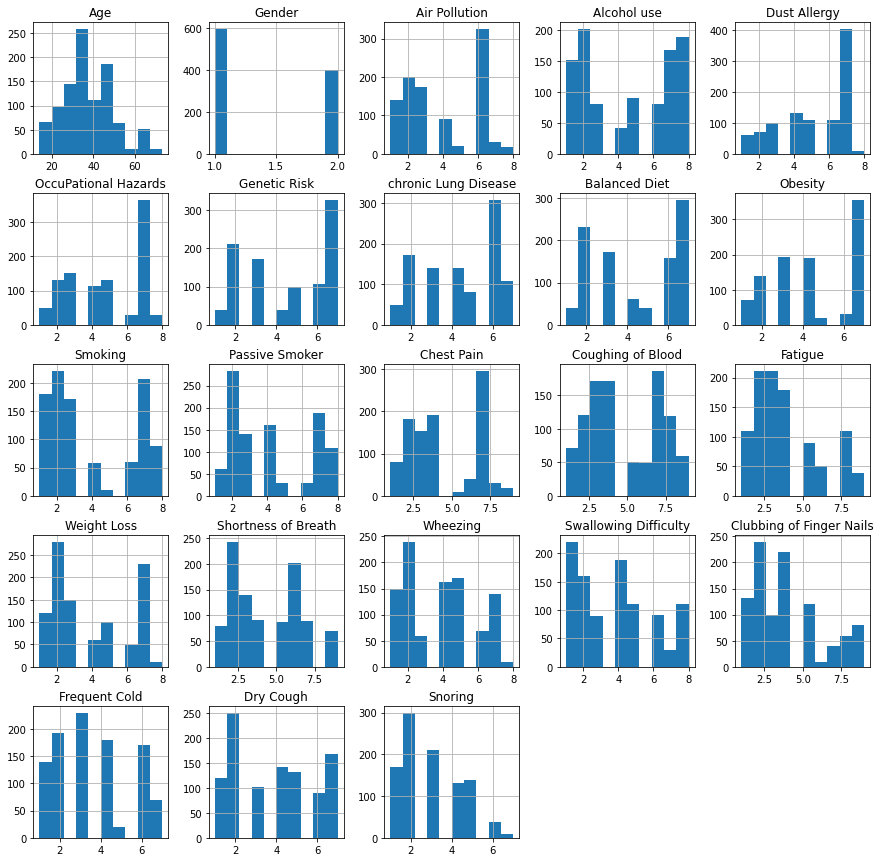

In [9]:
_ = cancer.hist(figsize=(15, 15))

Este próximo gráfico mostra a correlação das colunas umas com as outras, facilitando a análise.

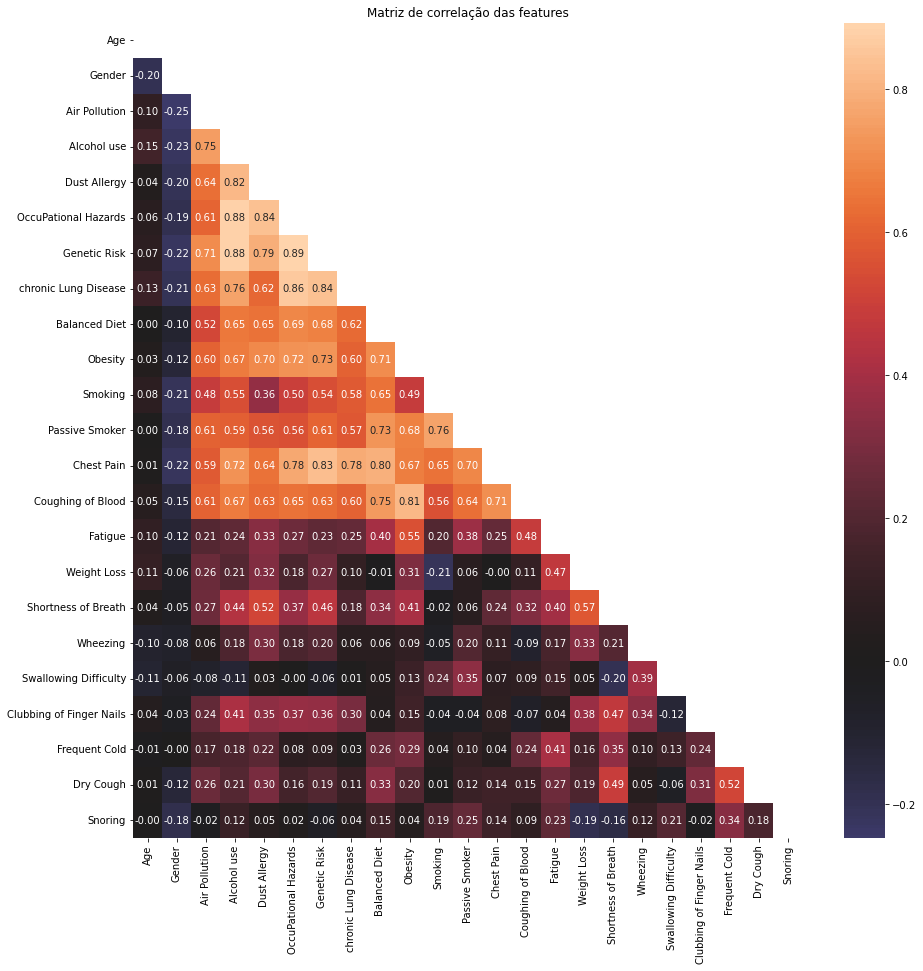

In [10]:
plt.figure(figsize=(15, 15))
correlation = cancer.corr() # método padrão -> pearson
# cria uma máscara para mostrar somente uma parte da matriz
# e não repeti-la acima da diagonal principal
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, annot=True, mask=mask, fmt='.2f', center=0)
_ = plt.title("Matriz de correlação das features")

Deste gráfico, podemos deduzir algumas informações, principalmente qual a relação que as variáveis tem uma com a outra.
Por exemplo, o **ronco** (`snoring`) pode estar diretamente ligado ao **gênero** (`gender`), do mesmo jeito que a **perda de peso** (`weight loss`) está relacionado com se é **fumante** ou não (`smoking`).

## Modelando dados para treinamento

Aqui começamos fazer as modificações necessárias para treinar e testar nosso modelo, que aqui usaremos um modelo de Redes Neurais.

Separamos as `features` do `target`, e transformamos este em valores numéricos e posteriormente adicionamos uma dimensão ao arquivo para estar no padrão necessário para o treinamento da rede.

In [11]:
X = cancer.drop(columns=['Level'])
y = LabelEncoder().fit_transform(cancer['Level'])
y = y.reshape(-1, 1)

Aqui transformamos o y (target) para o formato padrão de matriz de porcentagens da rede neural.

In [12]:
y = np_utils.to_categorical(y)
y

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

Realizamos a separação para o teste e treinamento, deixando o algoritmo aleatorizar sempre cada vez que rodarmos, sendo o padrão de separação em 3/4 para treinamento e 1/4 para teste.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Fazemos a normalização dos dados para fazer uma padronização e uma aproximação, fazendo uma espécie de "filtro" para ajudar a rede a entender melhor nossos dados.

In [14]:
scaler_train = StandardScaler()
scaler_test = StandardScaler()

X_train = scaler_train.fit_transform(X_train)
X_test = scaler_test.fit_transform(X_test)

Criamos nosso modelo, criando 4 camadas de neurônios, sendo três delas camadas densas de neurônios e uma Dropout, onde iremos forçar a rede a esquecer algumas coisas para não sofrer `overfit`. Posteriormente compilamos e rodamos as épocas para a rede poder aprender.

In [15]:
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(3, activation='softmax'),
])

2022-12-16 02:13:55.516675: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [16]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [17]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.3)

2022-12-16 02:13:55.730640: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
17/17 [==============================] - 1s 17ms/step - loss: 0.9356 - accuracy: 0.5505 - val_loss: 0.6838 - val_accuracy: 0.6756
Epoch 2/10
17/17 [==============================] - 0s 5ms/step - loss: 0.6224 - accuracy: 0.7352 - val_loss: 0.5030 - val_accuracy: 0.7956
Epoch 3/10
17/17 [==============================] - 0s 5ms/step - loss: 0.4409 - accuracy: 0.8514 - val_loss: 0.3969 - val_accuracy: 0.9333
Epoch 4/10
17/17 [==============================] - 0s 5ms/step - loss: 0.3322 - accuracy: 0.9371 - val_loss: 0.3128 - val_accuracy: 0.9556
Epoch 5/10
17/17 [==============================] - 0s 5ms/step - loss: 0.2770 - accuracy: 0.9410 - val_loss: 0.2465 - val_accuracy: 0.9600
Epoch 6/10
17/17 [==============================] - 0s 5ms/step - loss: 0.2023 - accuracy: 0.9676 - val_loss: 0.1989 - val_accuracy: 0.9600
Epoch 7/10
17/17 [==============================] - 0s 5ms/step - loss: 0.1475 - accuracy: 0.9771 - val_loss: 0.1661 - val_accuracy: 0.9644
Epoch 8/10
17/17 [=

Por se tratar de dados fáceis, a rede aprende de forma muito rápida e pode ser que ao invés dela aprender, ela decore os dados que existem no dataset, por isso usamos o `Dropout` para que ela evite "decorar" os dados e não realmente aprender os seus pesos.

## Perda de treinamento e validação

Essas são duas métricas que nos ajudam a definir se nossa rede está aprendendo bem ou não. Perda de validação é uma métrica usada para avaliar o desempenho de um modelo de aprendizado profundo no conjunto de validação e a perda de treinamento é uma métrica usada para avaliar como um modelo de aprendizado profundo se ajusta aos dados de treinamento .

Essas métricas nos indicam casos de `underfitting` e `overfitting`. Caso a perda de validação chegue em algum ponto que ela comece a crescer, é um sinal de `overfitting`, em outros casos, quando ambas as variáveis serem grandes, é um sinal de `underfitting`, sendo necessários mais épocas, modelagem alternativa ou obter mais amostras de dados.

No nosso modelo, é possível notar que ambas variáveis estão caminhando juntas, então pode-se concluir que nosso modelo está aprendendo os pesos de nossos dados.

In [18]:
test_loss, test_acc = model.evaluate(X_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


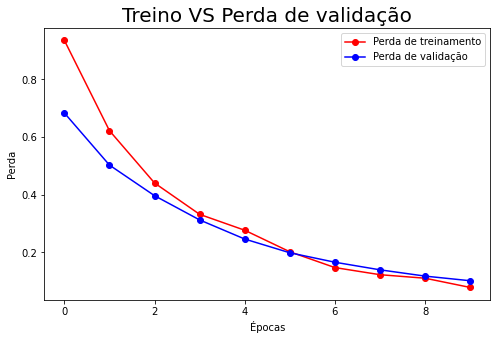

In [19]:
plt.figure(figsize = (8,5))
plt.plot(history.history["loss"], color = "r", label= "Perda de treinamento", marker = "o")
plt.plot(history.history["val_loss"], color = "b", label= "Perda de validação", marker = "o")
plt.title("Treino VS Perda de validação", fontsize = 20)
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.legend()
plt.show()

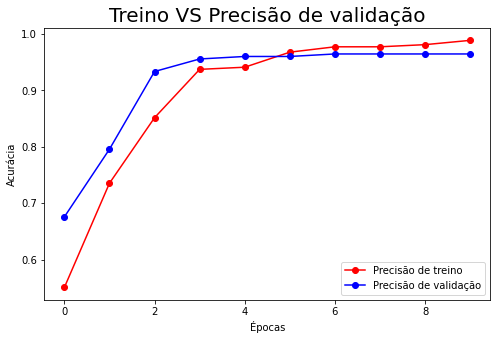

In [20]:
plt.figure(figsize = (8,5))
plt.plot(history.history["accuracy"], color = "r", label = "Precisão de treino", marker = "o")
plt.plot(history.history["val_accuracy"], color = "b", label = "Precisão de validação", marker = "o")
plt.title("Treino VS Precisão de validação", fontsize = 20)
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend()
plt.show()

Aqui realizamos a predição e ai transformamos nossas saídas do formato de matriz de probabilidades em vetores normais, para poder avaliar a acurácia do modelo.

In [21]:
predict = model.predict(X_test)

In [22]:
classes = np.argmax(predict, axis=1)
y_true = np.argmax(y_test, axis=1)

In [23]:
print(f"Com nosso modelo, obtivemos uma acurácia de {accuracy_score(classes, y_true) * 100}%")

Com nosso modelo, obtivemos uma acurácia de 97.2%
